In [314]:
using CLOUD, JLD2, Plots, LaTeXStrings

In [315]:
path = "../results/h_refinement/"

"../results/h_refinement/"

In [316]:
e_nmc = load_object(string(path,"NodalMulti_Tet_SkewSymmetricMapping_p4/central/errors.jld2"))
e_nmu = load_object(string(path,"NodalMulti_Tet_SkewSymmetricMapping_p4/upwind/errors.jld2"))
e_mmc = load_object(string(path,"ModalMulti_Tet_SkewSymmetricMapping_p4/central/errors.jld2"))
e_mmu = load_object(string(path,"ModalMulti_Tet_SkewSymmetricMapping_p4/upwind/errors.jld2"))
e_ntc = load_object(string(path,"NodalTensor_Tet_SkewSymmetricMapping_p4/central/errors.jld2"))
e_ntu = load_object(string(path,"NodalTensor_Tet_SkewSymmetricMapping_p4/upwind/errors.jld2"))
e_mtc = load_object(string(path,"ModalTensor_Tet_SkewSymmetricMapping_p4/central/errors.jld2"))
e_mtu = load_object(string(path,"ModalTensor_Tet_SkewSymmetricMapping_p4/upwind/errors.jld2"));

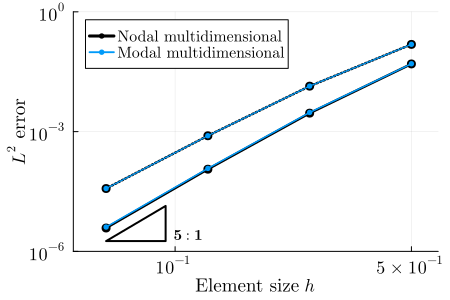

In [317]:
h = [1.0/2^n for n in eachindex(e_nmc)]

plt_m = plot(xaxis=:log10, yaxis=:log10, windowsize=(450,300), legendfontsize=10,
    fontfamily="Computer Modern", xtickfontsize=12, ytickfontsize=12, 
    xguidefontsize=12, yguidefontsize=12,
    xticks=([0.1,0.5], [L"10^{-1}",L"5 \times 10^{-1}"]),
    yticks=([1e-6,1e-3,1e0], [L"10^{-6}",L"10^{-3}", L"10^{0}"]),
    ylabel="\$L^2\$ error", xlabel="Element size \$h\$", 
    legend=:topleft, xlims=[5e-2,6e-1],  ylims=[1e-6,10e-1])
plot!(plt_m, h, e_nmc, label="", 
    linewidth=2.5, linestyle=:dot, markershape=:circle, 
    markersize=5, markerstrokewidth=0.0, color=:black)
plot!(plt_m, h,  e_nmu, label="Nodal multidimensional", 
    linewidth=2.5, linestyle=:solid, markershape=:circle, 
    markersize=5, markerstrokewidth=0.0, color=:black)
plot!(plt_m, h,  e_mmc, label="", 
    linewidth=1.5, linestyle=:dot, markershape=:circle, 
    markersize=3, markerstrokewidth=0.0, color=palette(:default)[1])
plot!(plt_m, h ,  e_mmu, label="Modal multidimensional", 
    linewidth=1.5, linestyle=:solid, markershape=:circle, 
    markersize=3, markerstrokewidth=0.0, color=palette(:default)[1])
r1 = h[end]
r2 = 0.75*h[end-1]
plot!(plt_m, [r1, r2, r2, r1], 1.9*[r1^5, r2^5, r1^5, r1^5], 
    label=:none, linewidth=2, color=:black, 
    annotations = (0.11, 2.7*r1^5, L"\mathbf{5:1}", 10))

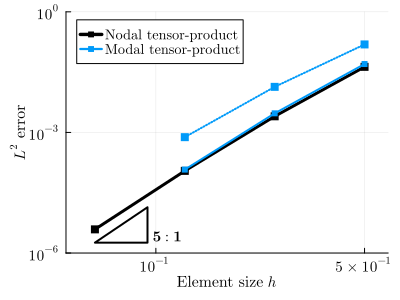

In [318]:
plt_t =plot(xaxis=:log10, yaxis=:log10, windowsize=(400,300), legendfontsize=9,
    fontfamily="Computer Modern", xtickfontsize=10, ytickfontsize=10, 
    xguidefontsize=10, yguidefontsize=10,
    xticks=([0.1,0.5], [L"10^{-1}",L"5 \times 10^{-1}"]),
    yticks=([1e-6,1e-3,1e0], [L"10^{-6}",L"10^{-3}", L"10^{0}"]),
    ylabel="\$L^2\$ error", xlabel="Element size \$h\$", legend=:topleft, 
    xlims=[5e-2,6e-1],  ylims=[1e-6,10e-1])
plot!(plt_t, h[1:4],  e_ntu, label="Nodal tensor-product", 
    linewidth=3.0, linestyle=:solid, markershape=:square, markersize=4, 
    markerstrokewidth=0.0, color=:black)
plot!(plt_t, h[1:3],  e_mtc, label="", 
    linewidth=2.0, linestyle=:dot, markershape=:square, markersize=4, 
    markerstrokewidth=0.0, markerstrokecolor=palette(:default)[1], color=palette(:default)[1])
plot!(plt_t, h[1:3] ,  e_mtu, label="Modal tensor-product", 
    linewidth=2.0, linestyle=:solid, markershape=:square, markersize=3, 
    markerstrokewidth=0.0, markerstrokecolor=palette(:default)[1], color=palette(:default)[1])
r1 = h[end]
r2 = 0.75*h[end-1]
plot!(plt_t, [r1, r2, r2, r1], 1.9*[r1^5, r2^5, r1^5, r1^5], 
    label=:none, linewidth=2, color=:black, 
    annotations = (0.11, 2.7*r1^5, L"\mathbf{5:1}", 10))

In [319]:
savefig(plt_m, "../plots/h_refinement/tet_p4_multi.pdf")
savefig(plt_t, "../plots/h_refinement/tet_p4_tensor.pdf")

"/Users/tristanmontoya/Research/TensorSimplexTests/plots/h_refinement/tet_p4_tensor.pdf"

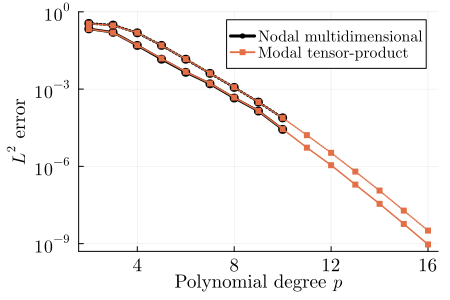

In [320]:
path = "../results/p_refinement/"

p_nm = load_object(string(path,"NodalMulti_Tet_SkewSymmetricMapping/central/poly_degrees.jld2"))
e_nmc = load_object(string(path,"NodalMulti_Tet_SkewSymmetricMapping/central/errors.jld2"))
e_nmu = load_object(string(path,"NodalMulti_Tet_SkewSymmetricMapping/upwind/errors.jld2"))
p_mt = load_object(string(path,"ModalTensor_Tet_SkewSymmetricMapping/central/poly_degrees.jld2"))
e_mtc = load_object(string(path,"ModalTensor_Tet_SkewSymmetricMapping/central/errors.jld2"))
e_mtu = load_object(string(path,"ModalTensor_Tet_SkewSymmetricMapping/upwind/errors.jld2"))

plt_p = plot(yaxis=:log10, windowsize=(450,300), legendfontsize=10,
    fontfamily="Computer Modern", xtickfontsize=12, ytickfontsize=12, 
    xguidefontsize=12, yguidefontsize=12, ylims=[5e-10,1e0],
    xticks=([4, 8, 12, 16], string.([4, 8, 12, 16])),
  yticks=([1e-12, 1e-9, 1e-6, 1e-3, 1e0], string.([L"10^{-12}", L"10^{-9}", L"10^{-6}", L"10^{-3}",L"10^{0}"])),
    ylabel="\$L^2\$ error", xlabel="Polynomial degree \$p\$")
plot!(plt_p, p_nm, e_nmu, label="Nodal multidimensional", 
    linewidth=2.5, linestyle=:solid, markershape=:circle,
    markersize=5, markerstrokewidth=0.0, color=:black)
plot!(plt_p, p_nm, e_nmc, label=:none, 
    linewidth=2.5, linestyle=:dot, markershape=:circle,
    markersize=5, markerstrokewidth=0.0, color=:black)
plot!(plt_p, p_mt, e_mtu, label="Modal tensor-product", 
    linewidth=1.5, linestyle=:solid, markershape=:square, 
    markersize=3, markerstrokewidth=0.0, markerstrokecolor=palette(:default)[2], color=palette(:default)[2])
plot!(plt_p, p_mt, e_mtc, label=:none, 
    linewidth=1.5, linestyle=:dot, markershape=:square, 
    markersize=3, markerstrokewidth=0.0, markerstrokecolor=palette(:default)[2], 
    color=palette(:default)[2])

In [321]:
savefig(plt_p, "../plots/p_refinement/tet_M2.pdf")

"/Users/tristanmontoya/Research/TensorSimplexTests/plots/p_refinement/tet_M2.pdf"